In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
print(df.shape)

(5572, 5)


In [3]:
#df = pd.read_csv('spam.csv',encoding='ISO-8859-1',chunksize=1000)

In [4]:
# for chunk in df:
#     print(chunk.shape)

In [5]:
#  *** Workflow***

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# observation unnames2 , unnamed 3,unnamed4 has very less value.so remove these cols
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# renaing the cols title

df.rename(columns = {"v1":"output" , "v2":"messages"},inplace=True)

In [10]:
df.head()

,output,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# there are 2 types of output spam and ham .. mark them as 0 1

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["output"] = encoder.fit_transform(df['output'])

In [12]:
df.head()

,output,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#check for missing values

df.isna().sum() # no missing values.

output      0
messages    0
dtype: int64

In [14]:
#check duplicate values

df.duplicated().sum()

403

In [15]:
# remove duplicates.
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

## 2. EDA : Exploratory Data analysis.

In [17]:
df.head()

,output,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#check how many spam and ham msgs are there
df["output"].value_counts() # observation : imbalanced data as ham msgs (4516) > spam(653)

output
0    4516
1     653
Name: count, dtype: int64

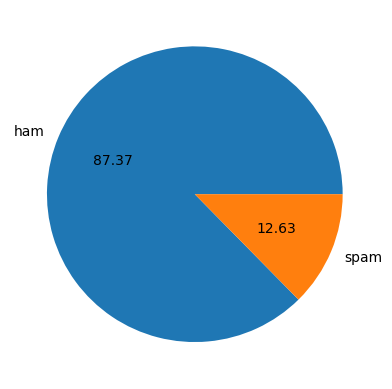

In [19]:
# pplot it in pie chart
import matplotlib.pyplot as plt
plt.pie(df["output"].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")
plt.show() # 88 % are ham msgs and 13 % are spam

In [20]:
import nltk


In [21]:
df["num_of_char"] = df["messages"].apply(len)

In [22]:
df.head()

,output,messages,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [24]:
 df["no_of_words"] = df["messages"].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,output,messages,num_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# ham msgs
df[df["output"]== 0][["num_of_char","no_of_words"]].describe()

,num_of_char,no_of_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [27]:
# spam msgs
df[df["output"]== 1][["num_of_char","no_of_words"]].describe()

,num_of_char,no_of_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


In [28]:
# clearly seen, for ham msgs the num of char (70) is less than spam msgs num of char (137)
# so spam msgs are bigger than ham msgs.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_char', ylabel='Count'>

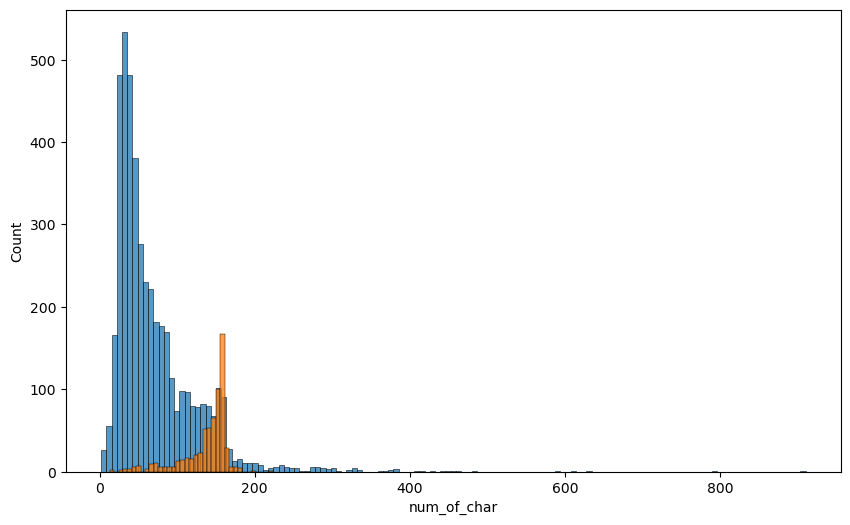

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df[df["output"]==0]["num_of_char"]) # for ham
sns.histplot(df[df["output"]==1]["num_of_char"]) # for spam

In [30]:
# check corelation

df.corr(numeric_only = True)

,output,num_of_char,no_of_words
output,1.000000,0.384717,0.262912
num_of_char,0.384717,1.000000,0.965760
no_of_words,0.262912,0.965760,1.000000


<Axes: >

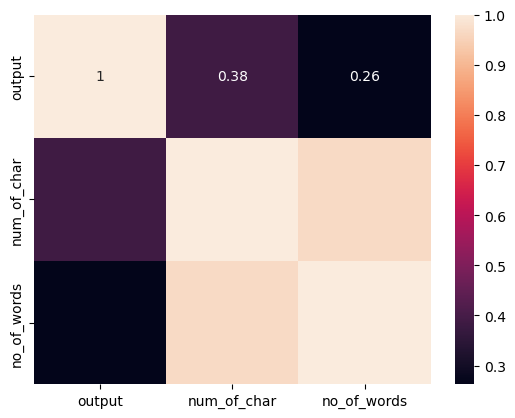

In [31]:
sns.heatmap(df.corr(numeric_only = True),annot = True)
# output and num of char correlation is high (0.38). 
# when we build model we will use num of char 

## 3. Data Preprocessing
- lower case
- tokenization
- remove special characters
- remove stop words
- stemming / lemmatization

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
punctuation_marks = string.punctuation
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
punctuation_marks


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
text = []
punctuation_marks = string.punctuation
lemmatized_text = []
lemmatizer = WordNetLemmatizer()
def text_preprocess(msg):
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    temp=[]
    
    for word in msg:
        if word not in stopwords.words('english') and word not in punctuation_marks:
            temp.append(word)
    text = temp[:]
    temp.clear()
    lemmatized_text = [lemmatizer.lemmatize(words) for words in text]

    return " ".join(lemmatized_text)

In [35]:
df.to_csv('updated-spam-detection.csv')

In [36]:
df["processed_text"] = df["messages"].apply(text_preprocess)

In [37]:
df.head()

,output,messages,num_of_char,no_of_words,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah n't think go usf life around though


In [38]:
df["messages"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
df["processed_text"][0]

'go jurong point crazy .. available bugis n great world la e buffet ... cine got amore wat ...'

### finding most common words use in the spam msgs



In [40]:
spam_msgs = df[df["output"]==1]['processed_text'].tolist() #convert spam msgs in list

In [41]:
spam_corpus = []
for msg in spam_msgs: # iterating through sentece
    for word in msg.split(): # iterating words in each sentence
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

11083

In [43]:
from collections import Counter
Counter(spam_corpus).most_common(40)

[('call', 313),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 126),
 ('text', 121),
 ('ur', 119),
 ('mobile', 114),
 ('stop', 104),
 ('claim', 98),
 ('reply', 97),
 ('4', 97),
 ('prize', 82),
 ('c', 80),
 ('get', 70),
 ('new', 64),
 ('service', 64),
 ('tone', 63),
 ("'s", 59),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('phone', 52),
 ('cash', 51),
 ('contact', 51),
 ('week', 49),
 ('please', 49),
 ('win', 48),
 ('min', 45),
 ('customer', 42),
 ('guaranteed', 42),
 ('per', 41),
 ('message', 40),
 ('chat', 36),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('show', 33),
 ('today', 33),
 ('line', 33)]

### finding most common words use in the ham msgs

In [44]:
ham_corpus=[]
ham_msgs = df[df["output"]==0]["processed_text"].tolist()
for sentence in ham_msgs:
    for word in sentence.split():
        ham_corpus.append(word)
        
        

In [45]:
len(ham_corpus)

39894

In [46]:
from collections import Counter
Counter(ham_corpus).most_common(40)

[('...', 1073),
 ('u', 935),
 ('..', 524),
 ("'s", 413),
 ("'m", 371),
 ("n't", 338),
 ('get', 304),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('go', 267),
 ('got', 236),
 ('know', 233),
 ('come', 226),
 ('like', 224),
 ('ok', 217),
 ('time', 213),
 ('good', 213),
 ("''", 201),
 ('ur', 197),
 ("'ll", 195),
 ('call', 194),
 ('day', 190),
 ('want', 179),
 ('love', 178),
 ('need', 166),
 ('one', 165),
 ('going', 164),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('still', 143),
 ('da', 142),
 ('see', 135),
 ('think', 130),
 ('r', 128),
 ('back', 127),
 ('take', 126),
 ('today', 123),
 ('sorry', 121)]

# 4. Model building

- step1: text 2 vector ( using bag of word or TF-idf)
- step2: build model

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 2000)


In [123]:
X = tfidf_vectorizer.fit_transform(df["processed_text"]).toarray()

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # uing minmaxscaler instead of standerd scaler. cz standard scaler given negative value
X = scaler.fit_transform(X)

In [125]:
X.shape

(5169, 2000)

In [126]:
y = df["output"].values

In [127]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 42)

In [130]:
X_train.shape

(4393, 2000)

In [131]:
y_train.shape

(4393,)

In [132]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [133]:
gnb = GaussianNB()
mnb =  MultinomialNB()
bnb = BernoulliNB()

In [134]:
# Gaussian NB
gnb.fit(X_train,y_train)
Y_pred1= gnb.predict(X_test)

print('accuracy score of GaussianNB: ',accuracy_score(y_test,Y_pred1))
print('confusion_matrix of GaussianNB: ')
print(confusion_matrix(y_test,Y_pred1))
print('precision_score of GaussianNB: ',precision_score(y_test,Y_pred1))


accuracy score of GaussianNB:  0.854381443298969
confusion_matrix of GaussianNB: 
[[565 100]
 [ 13  98]]
precision_score of GaussianNB:  0.494949494949495


In [135]:
# Multinomial NB

mnb.fit(X_train,y_train)
Y_pred2 = mnb.predict(X_test)

print("accuracy score of MultinomialNB: ",accuracy_score(y_test,Y_pred2))
print("precision score of MultinomialNB: ",precision_score(y_test,Y_pred2))
print('confusion_matrix of MultinomialNB: ')
print(confusion_matrix(y_test,Y_pred2))

accuracy score of MultinomialNB:  0.9806701030927835
precision score of MultinomialNB:  0.98
confusion_matrix of MultinomialNB: 
[[663   2]
 [ 13  98]]


In [136]:
# BernoulliNB
bnb.fit(X_train,y_train)
Y_pred3 = bnb.predict(X_test)

print("accuracy score of BernoulliNB: ",accuracy_score(y_test,Y_pred3))
print("precision score of BernoulliNB: ",precision_score(y_test,Y_pred3))
print('confusion_matrix of BernoulliNB: ')
print(confusion_matrix(y_test,Y_pred3))


accuracy score of BernoulliNB:  0.9768041237113402
precision score of BernoulliNB:  0.9894736842105263
confusion_matrix of BernoulliNB: 
[[664   1]
 [ 17  94]]


In [137]:
# Observation: Multinomial NB gives best result in terms of precision score. which is more imp here

In [138]:
!pip install scikit-learn xgboost

In [139]:
# Comparing other ML models with Multinomial model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [140]:

logistic_model = LogisticRegression()
svc_model = SVC()
multinomial_nb_model = MultinomialNB()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
adaboost_model = AdaBoostClassifier()
bagging_model = BaggingClassifier()
extra_trees_model = ExtraTreesClassifier()
gradient_boost_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()


In [141]:
classifiers = {
    'logisticRegression' : logistic_model,
    'SVC': svc_model ,
    'MultinomialNB':multinomial_nb_model,
    'Decition Tree':decision_tree_model,
    'KNN':knn_model ,
    'AdaBoost':adaboost_model,
    'Bagging':bagging_model,
    'ExtraTrees' : extra_trees_model,
    'Gradient_boost':gradient_boost_model ,
    'XGB': xgb_model
}

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [143]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [144]:
accuracy,precision = train_classifier(xgb_model,X_train,y_train,X_test,y_test)

In [145]:
print(accuracy)
print(precision)

0.9755154639175257
0.9509803921568627


In [146]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    curr_accuracy,curr_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("accuracy: ",curr_accuracy)
    print("precision: ",curr_precision)
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)
    
    

For  logisticRegression
accuracy:  0.9742268041237113
precision:  0.989247311827957
For  SVC
accuracy:  0.9806701030927835
precision:  1.0
For  MultinomialNB
accuracy:  0.9806701030927835
precision:  0.98
For  Decition Tree
accuracy:  0.9626288659793815
precision:  0.853448275862069
For  KNN
accuracy:  0.9110824742268041
precision:  1.0
For  AdaBoost
accuracy:  0.9780927835051546
precision:  0.9351851851851852
For  Bagging
accuracy:  0.9690721649484536
precision:  0.9142857142857143
For  ExtraTrees
accuracy:  0.9845360824742269
precision:  1.0
For  Gradient_boost
accuracy:  0.9626288659793815
precision:  0.9767441860465116
For  XGB
accuracy:  0.9755154639175257
precision:  0.9509803921568627


In [147]:
import pandas as pd
performance_df = pd.DataFrame({"Algorithms": classifiers.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values('Precision',ascending=False)


In [148]:
performance_df 

,Algorithms,Accuracy,Precision
1,SVC,0.980670,1.000000
4,KNN,0.911082,1.000000
7,ExtraTrees,0.984536,1.000000
0,logisticRegression,0.974227,0.989247
2,MultinomialNB,0.980670,0.980000
8,Gradient_boost,0.962629,0.976744
9,XGB,0.975515,0.950980
5,AdaBoost,0.978093,0.935185
6,Bagging,0.969072,0.914286
3,Decition Tree,0.962629,0.853448


In [149]:
# Voting classifier : to make combination of best performing model so that model can be approved.
svc = SVC()
etc = ExtraTreesClassifier()# ExtraTrees
mnb = MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [150]:
voting_clf = VotingClassifier(estimators = [('svm',svc),('nb',mnb),('et',etc)],voting="hard")

In [151]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC()), ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier())])

In [152]:
from sklearn.metrics import accuracy_score,precision_score

In [153]:

y_pred = voting_clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy:  0.9845360824742269
Precision :  1.0


In [154]:
# voting classifies gives best result till now.

In [155]:
#pipeline;
# whenever we get new emain we have check 3 step:
# 1. text pre process : lower case, tokenization, lemmatization
# 2 text 2 vector
# 3 apply algorithm

In [156]:
import pickle
pickle.dump(tfidf_vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(voting_clf,open('model.pkl','wb'))